In [31]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, normalize

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
df = pd.read_csv('data/data_processed.csv')

## Select a subset of features
As there are too many features, we select only the most important features as input to the linear regression model.

In [33]:
candidate_cols = [
#      'travel_date_dow',
     'o_purpose_category',
     'd_purpose_category',
#      'num_non_hh_travelers',
#      'num_hh_travelers',
     'num_travelers',
#      'o_location_type',
#      'd_location_type',
#      'o_congestion',
     'd_congestion',
#      'age',
#      'employment',
#      'student',
     'license',
#      'planning_apps',
#      'industry',
#      'gender',
#      'education',
#      'survey_language',
#      'num_bicycles',
     'num_vehicles',
#      'res_type',
     'rent_own',
#      'income_aggregate',
#      'num_people',
#      'num_adults',
#      'num_kids',
#      'num_workers',
#      'num_students',
#      'disability'
#     'trip_distance'
]


categorial_columns = ['travel_date_dow', 'o_purpose_category', 'd_purpose_category', 'o_location_type',
                      'd_location_type', 'age', 'employment', 'license', 'planning_apps', 'industry',
                      'gender', 'survey_language', 'res_type', 'rent_own',  'disability']

onehot = pd.get_dummies(df[candidate_cols], columns=[x for x in categorial_columns if x in candidate_cols])

In [34]:
onehot

,num_travelers,d_congestion,num_vehicles,o_purpose_category_1,o_purpose_category_2,o_purpose_category_3,o_purpose_category_4,o_purpose_category_5,o_purpose_category_6,o_purpose_category_7,...,d_purpose_category_7,d_purpose_category_8,d_purpose_category_9,d_purpose_category_10,license_0,license_1,rent_own_-9998,rent_own_1,rent_own_2,rent_own_3
0,1,0,2,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
1,1,0,2,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,3,0,2,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,1,0
3,3,0,2,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,1,0
4,1,0,2,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39439,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
39440,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
39441,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
39442,2,0,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0


In [35]:
X = onehot.to_numpy()
X = normalize(X, axis=0)
y = df['trip_distance'].to_numpy()
group = df['person_id'].to_numpy()

In [36]:
X

array([[0.00249434, 0.        , 0.00853805, ..., 0.        , 0.00681139,
        0.        ],
       [0.00249434, 0.        , 0.00853805, ..., 0.        , 0.00681139,
        0.        ],
       [0.00748302, 0.        , 0.00853805, ..., 0.        , 0.00681139,
        0.        ],
       ...,
       [0.00498868, 0.        , 0.        , ..., 0.        , 0.00681139,
        0.        ],
       [0.00498868, 0.        , 0.        , ..., 0.        , 0.00681139,
        0.        ],
       [0.00498868, 0.        , 0.        , ..., 0.        , 0.00681139,
        0.        ]])

In [37]:
from utils import k_fold_cross_validation_regression

model = LinearRegression()
train_metrics, val_metrics = k_fold_cross_validation_regression(X, y, group, model)


In [38]:
metrics = np.concatenate((train_metrics, val_metrics), axis=1)
metrics = metrics[:,[0, 3, 1, 4, 2, 5]]
train_metrics_df = pd.DataFrame(metrics, columns=['mse-train', 'mse-val', 'mae-train', 'mae-val', 'mape-train', 'mape-val'])
train_metrics_df



,mse-train,mse-val,mae-train,mae-val,mape-train,mape-val
0,11.769130,13.115791,2.401262,2.501601,4.410388,4.205343
1,12.253232,11.162633,2.458891,2.426862,4.426383,4.882485
2,11.918098,12.502827,2.422670,2.438679,4.384180,4.331734
3,12.042174,12.000677,2.433283,2.401711,4.432539,4.190064
4,12.145110,11.593931,2.455750,2.437500,4.491163,4.610888


In [41]:
train_metrics_df.to_csv('stats/linear_regression_distance.csv')

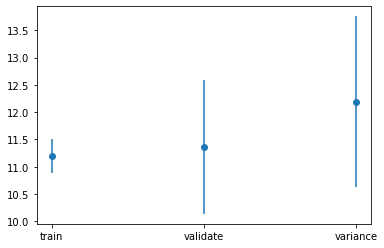

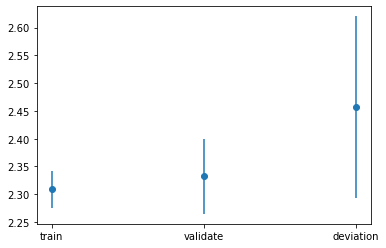

In [40]:
import matplotlib.pyplot as plt

mse_avg = np.average(np.array(mse), axis=0)
mse_std = np.std(np.array(mse), axis=0)
plt.xticks([0, 1, 2], ['train', 'validate', 'variance'])
plt.errorbar([0, 1, 2], mse_avg, yerr=mse_std, linestyle='None', marker='o')
plt.show()


mae_avg = np.average(np.array(mae), axis=0)
mae_std = np.std(np.array(mae), axis=0)
plt.xticks([0, 1, 2], ['train', 'validate', 'deviation'])
plt.errorbar([0, 1, 2], mae_avg, yerr=mae_std, linestyle='None', marker='o')
plt.show()